In [1]:
import pandas as pd
import numpy as np
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

# data

In [2]:
data = pd.read_csv("dataset/train.csv",low_memory=False,parse_dates=[2])
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id
0,1,5,2015-07-17,4852,519,1,1,0,0,303445
1,2,5,2015-07-17,4518,495,1,1,0,1,959585
2,3,5,2015-07-17,6679,673,1,1,0,1,739744
3,4,5,2015-07-17,10514,1343,1,1,0,1,864001
4,5,5,2015-07-17,4355,513,1,1,0,1,981931


In [3]:
data.sort_values('Date',ascending=True,inplace=True)

In [4]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [5]:
data.to_csv("dataset/train_sorted.csv",index=False)

In [6]:
train_sorted = pd.read_csv("dataset/train_sorted.csv",parse_dates=[2],low_memory=False)

In [7]:
train_sorted.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,Year,Month,Day
0,1115,2,2013-01-01,0,0,0,0,a,1,959362,2013,1,1
1,379,2,2013-01-01,0,0,0,0,a,1,430420,2013,1,1
2,378,2,2013-01-01,0,0,0,0,a,1,615622,2013,1,1
3,377,2,2013-01-01,0,0,0,0,a,1,963377,2013,1,1
4,376,2,2013-01-01,0,0,0,0,a,1,324452,2013,1,1


In [8]:
train_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001599 entries, 0 to 1001598
Data columns (total 13 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1001599 non-null  int64         
 1   DayOfWeek      1001599 non-null  int64         
 2   Date           1001599 non-null  datetime64[ns]
 3   Sales          1001599 non-null  int64         
 4   Customers      1001599 non-null  int64         
 5   Open           1001599 non-null  int64         
 6   Promo          1001599 non-null  int64         
 7   StateHoliday   1001599 non-null  object        
 8   SchoolHoliday  1001599 non-null  int64         
 9   Id             1001599 non-null  int64         
 10  Year           1001599 non-null  int64         
 11  Month          1001599 non-null  int64         
 12  Day            1001599 non-null  int64         
dtypes: datetime64[ns](1), int64(11), object(1)
memory usage: 99.3+ MB


In [9]:
train_sorted.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Id,Year,Month,Day
0,1115,2,2013-01-01,0,0,0,0,a,1,959362,2013,1,1
1,379,2,2013-01-01,0,0,0,0,a,1,430420,2013,1,1
2,378,2,2013-01-01,0,0,0,0,a,1,615622,2013,1,1
3,377,2,2013-01-01,0,0,0,0,a,1,963377,2013,1,1
4,376,2,2013-01-01,0,0,0,0,a,1,324452,2013,1,1


In [10]:
ids = train_sorted['Id']
store_num = train_sorted['Store']

In [11]:
train_sorted.drop(columns=['Store', 'Id','Date'],inplace=True)

In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(train_sorted[['StateHoliday']])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['StateHoliday']))

train_sorted = pd.concat([train_sorted.drop(columns=['StateHoliday']), encoded_df], axis=1)

In [13]:
train_sorted[:-20]

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,2,0,0,0,0,1,2013,1,1,0.0,1.0,0.0,0.0
1,2,0,0,0,0,1,2013,1,1,0.0,1.0,0.0,0.0
2,2,0,0,0,0,1,2013,1,1,0.0,1.0,0.0,0.0
3,2,0,0,0,0,1,2013,1,1,0.0,1.0,0.0,0.0
4,2,0,0,0,0,1,2013,1,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001574,5,7301,593,1,1,0,2015,7,17,1.0,0.0,0.0,0.0
1001575,5,16296,2265,1,1,1,2015,7,17,1.0,0.0,0.0,0.0
1001576,5,11530,886,1,1,1,2015,7,17,1.0,0.0,0.0,0.0
1001577,5,6563,788,1,1,1,2015,7,17,1.0,0.0,0.0,0.0


In [15]:
size = int(0.8*len(train_sorted))

In [16]:
x = train_sorted.drop(columns=['Sales'])
y = train_sorted['Sales']
x_train = x[:size]
x_test = x[size:]
y_train = y[:size]
y_test = y[size:]

In [17]:
x_test.shape , x_train.shape , y_test.shape , y_train.shape

((200320, 12), (801279, 12), (200320,), (801279,))

In [18]:
type(x_test) , type(x_train.shape) , type(y_test) , type(y_train)

(pandas.core.frame.DataFrame,
 tuple,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [19]:
y_train = y_train.to_numpy()

In [20]:
y_train[10001]

8660

# train 

In [21]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [22]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [23]:
model_scores = fit_and_score(models=models,
                             X_train=x_train,
                             X_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

MemoryError: Unable to allocate 125. GiB for an array with shape (801279, 21006) and data type float64

# xgboost

In [29]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=1000, learning_rate=0.05, max_depth=6)
model.fit(x_train, y_train, eval_set=[(x_test, y_test)], verbose=100)

[0]	validation_0-rmse:3679.63185
[100]	validation_0-rmse:1382.71609
[200]	validation_0-rmse:1370.34883
[300]	validation_0-rmse:1372.20358
[400]	validation_0-rmse:1373.57649
[500]	validation_0-rmse:1375.59556
[600]	validation_0-rmse:1380.22192
[700]	validation_0-rmse:1381.59858
[800]	validation_0-rmse:1382.91757
[900]	validation_0-rmse:1384.53768
[999]	validation_0-rmse:1385.60639


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
import numpy as np

def rmspe(y_true, y_pred, epsilon=1e-10):
    y_true = np.array(y_true) + epsilon
    y_pred = np.array(y_pred) + epsilon
    
    # Calculate the percentage error
    percentage_error = (y_true - y_pred) / y_true
    
    # Calculate RMSPE
    rmspe_value = np.sqrt(np.mean(percentage_error ** 2)) * 100
    
    return rmspe_value

In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score, root_mean_squared_error
y_pred = model.predict(x_test)

In [32]:
rmspe =root_mean_squared_error(y_test, y_pred)
print(f"RMSE: {rmspe}")

RMSE: 1385.6063903871766


In [33]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
1,Customers,0.721681
3,Promo,0.154943
2,Open,0.058576
0,DayOfWeek,0.019766
6,Month,0.012541
8,StateHoliday_0,0.009204
10,StateHoliday_b,0.008650
7,Day,0.006578
5,Year,0.002922
4,SchoolHoliday,0.002796


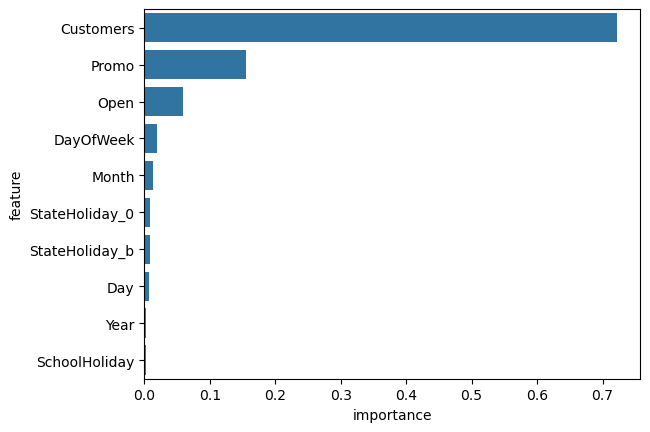

In [34]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(512, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)  # Regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mse'])
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25, batch_size=512)

Epoch 1/25
1565/1565 [==============================] - 8s 5ms/step - loss: 2631449.5000 - mse: 2631449.5000 - val_loss: 2313698.7500 - val_mse: 2313698.7500
Epoch 2/25
1565/1565 [==============================] - 7s 4ms/step - loss: 2078289.5000 - mse: 2078289.5000 - val_loss: 2139747.5000 - val_mse: 2139747.5000
Epoch 3/25
1565/1565 [==============================] - 8s 5ms/step - loss: 1963443.5000 - mse: 1963443.5000 - val_loss: 1995267.0000 - val_mse: 1995267.0000
Epoch 4/25
1565/1565 [==============================] - 7s 5ms/step - loss: 1920111.5000 - mse: 1920111.5000 - val_loss: 2180172.0000 - val_mse: 2180172.0000
Epoch 5/25
1565/1565 [==============================] - 7s 4ms/step - loss: 1902167.6250 - mse: 1902167.6250 - val_loss: 2395216.7500 - val_mse: 2395216.7500
Epoch 6/25
1565/1565 [==============================] - 6s 4ms/step - loss: 1886441.1250 - mse: 1886441.1250 - val_loss: 2238751.5000 - val_mse: 2238751.5000
Epoch 7/25
1565/1565 [==============================

# test file

In [37]:
test_file = pd.read_csv("dataset/test.csv",parse_dates=[3])

In [38]:
test_file['Year'] = test_file["Date"].dt.year
test_file['Month'] = test_file["Date"].dt.month
test_file['Day'] = test_file["Date"].dt.day

In [39]:
test_file.sort_values(['Date'])

,Id,Store,DayOfWeek,Date,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,879066,1,5,2015-07-31,555,1,1,0,1,2015,7,31
734,702665,735,5,2015-07-31,594,1,1,0,1,2015,7,31
735,874339,736,5,2015-07-31,541,1,1,0,0,2015,7,31
736,352452,737,5,2015-07-31,1232,1,1,0,1,2015,7,31
737,517828,738,5,2015-07-31,749,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...,...,...,...
369,522400,370,5,2015-07-31,714,1,1,0,1,2015,7,31
368,431841,369,5,2015-07-31,646,1,1,0,1,2015,7,31
367,94057,368,5,2015-07-31,1025,1,1,0,1,2015,7,31
373,953744,374,5,2015-07-31,938,1,1,0,1,2015,7,31


In [40]:
test_ids = test_file['Id']

In [41]:
test_file.drop(columns=['Date','Id','Store'],inplace=True)

In [42]:
test_file

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day
0,5,555,1,1,0,1,2015,7,31
1,5,625,1,1,0,1,2015,7,31
2,5,821,1,1,0,1,2015,7,31
3,5,1498,1,1,0,1,2015,7,31
4,5,559,1,1,0,1,2015,7,31
...,...,...,...,...,...,...,...,...,...
1110,5,422,1,1,0,1,2015,7,31
1111,5,767,1,1,0,1,2015,7,31
1112,5,720,1,1,0,1,2015,7,31
1113,5,3745,1,1,0,1,2015,7,31


In [43]:
test_file['StateHoliday'].nunique()

1

In [44]:
test_file.rename(columns={'StateHoliday':'StateHoliday_0'},inplace=True)

In [45]:
test_file['StateHoliday_0'] = 1.0
test_file['StateHoliday_a'] = 0.0
test_file['StateHoliday_b'] = 0.0
test_file['StateHoliday_c'] = 0.0

In [46]:
test_file

,DayOfWeek,Customers,Open,Promo,StateHoliday_0,SchoolHoliday,Year,Month,Day,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,5,555,1,1,1.0,1,2015,7,31,0.0,0.0,0.0
1,5,625,1,1,1.0,1,2015,7,31,0.0,0.0,0.0
2,5,821,1,1,1.0,1,2015,7,31,0.0,0.0,0.0
3,5,1498,1,1,1.0,1,2015,7,31,0.0,0.0,0.0
4,5,559,1,1,1.0,1,2015,7,31,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1110,5,422,1,1,1.0,1,2015,7,31,0.0,0.0,0.0
1111,5,767,1,1,1.0,1,2015,7,31,0.0,0.0,0.0
1112,5,720,1,1,1.0,1,2015,7,31,0.0,0.0,0.0
1113,5,3745,1,1,1.0,1,2015,7,31,0.0,0.0,0.0


In [47]:
test_file = test_file[x_train.columns]

In [48]:
y_pred = model.predict(test_file)

35/35 [==============================] - 0s 2ms/step


In [ ]:
results = pd.DataFrame(data={'Id': test_ids, 'Sales': y_pred}, columns=['Id', 'Sales'])

In [ ]:
results.to_csv("dataset/results.csv")